# Dark Pool Trade Analysis

This notebook connects to the production database and analyzes dark pool trades.

In [129]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import pytz
from dotenv import load_dotenv

# Set plot style
#plt.style.use('seaborn')
#"sns.set_palette('deep')
%matplotlib inline

In [130]:
# Database connection setup
DB_CONFIG = {
    'dbname': 'defaultdb',
    'user': 'doadmin',
    'password': 'AVNS_SrG4Bo3B7uCNEPONkE4',
    'host': 'vvv-trading-db-do-user-2110609-0.i.db.ondigitalocean.com',
    'port': '25060'
}

# Create database URL
DATABASE_URL = f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"

# Create engine with SSL required
engine = create_engine(
    DATABASE_URL,
    connect_args={
        'sslmode': 'require'
    }
)

In [131]:
# Function to fetch trades for a specific date
def fetch_trades(date_str=None):
    query = """
    SELECT *
    FROM trading.darkpool_trades
    WHERE DATE(executed_at) = %(date)s
    ORDER BY executed_at
    """
    
    if date_str is None:
        date_str = '2025-04-17'  # Default to our test data date
    
    # Pass parameters as a dictionary
    params = {'date': date_str}
    return pd.read_sql_query(query, engine, params=params)

# Fetch trades for April 17th
trades_df = fetch_trades('2025-04-17')
print(f"Fetched {len(trades_df)} trades")
trades_df.head()

Fetched 15 trades


,id,tracking_id,symbol,size,price,volume,premium,executed_at,nbbo_ask,nbbo_bid,market_center,sale_cond_codes,collection_time,created_at
0,415,70331564740492,QQQ,493.0,445.3000,44810365.0,219532.9000,2025-04-17 23:32:11+00:00,445.55,445.18,L,None,2025-04-19 19:54:42.651306+00:00,2025-04-19 19:54:42.663577+00:00
1,414,70374608487124,SPY,473.0,527.2100,79846628.0,249370.3300,2025-04-17 23:32:54+00:00,527.24,527.01,L,None,2025-04-19 19:54:42.651306+00:00,2025-04-19 19:54:42.663577+00:00
2,413,70454350009635,QQQ,299.0,445.3884,44811967.0,133171.1316,2025-04-17 23:34:14+00:00,445.39,445.30,L,None,2025-04-19 19:54:42.651306+00:00,2025-04-19 19:54:42.663577+00:00
3,412,70469265910490,QQQ,1000.0,445.2500,44813023.0,445250.0000,2025-04-17 23:34:29+00:00,445.39,445.30,L,None,2025-04-19 19:54:42.651306+00:00,2025-04-19 19:54:42.663577+00:00
4,411,70629848116153,QQQ,729.0,445.1111,44814745.0,324485.9919,2025-04-17 23:37:09+00:00,445.40,445.11,L,None,2025-04-19 19:54:42.651306+00:00,2025-04-19 19:54:42.663577+00:00


In [132]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection setup
DB_CONFIG = {
    'dbname': 'defaultdb',
    'user': 'doadmin',
    'password': 'AVNS_SrG4Bo3B7uCNEPONkE4',
    'host': 'vvv-trading-db-do-user-2110609-0.i.db.ondigitalocean.com',
    'port': '25060'
}

# Create database URL
DATABASE_URL = f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"

# Create engine with SSL required
engine = create_engine(
    DATABASE_URL,
    connect_args={
        'sslmode': 'require'
    }
)

# Query the most recent logs
query = """
SELECT 
    timestamp,
    level,
    message,
    date_trunc('minute', timestamp) as log_minute,
    count(*) over (partition by date_trunc('minute', timestamp)) as logs_per_minute
FROM trading.collector_logs
ORDER BY timestamp DESC
LIMIT 10
"""

logs_df = pd.read_sql_query(query, engine)
print(f"\nMost recent {len(logs_df)} log entries:")
display(logs_df)


Most recent 10 log entries:


,timestamp,level,message,log_minute,logs_per_minute
0,2025-04-22 06:30:02.389933+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:30:00+00:00,1
1,2025-04-22 06:25:02.236330+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:25:00+00:00,1
2,2025-04-22 06:20:02.007289+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:20:00+00:00,1
3,2025-04-22 06:15:02.963044+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:15:00+00:00,1
4,2025-04-22 06:10:02.702876+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:10:00+00:00,1
5,2025-04-22 06:05:02.598544+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:05:00+00:00,1
6,2025-04-22 06:00:02.495077+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 06:00:00+00:00,1
7,2025-04-22 05:55:02.465276+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 05:55:00+00:00,1
8,2025-04-22 05:50:02.619998+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 05:50:00+00:00,1
9,2025-04-22 05:45:02.590101+00:00,INFO,Market closed - Next open: 2025-04-22 09:30 ET,2025-04-22 05:45:00+00:00,1


In [121]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection setup
DB_CONFIG = {
    'dbname': 'defaultdb',
    'user': 'doadmin',
    'password': 'AVNS_SrG4Bo3B7uCNEPONkE4',
    'host': 'vvv-trading-db-do-user-2110609-0.i.db.ondigitalocean.com',
    'port': '25060'
}

# Create database URL
DATABASE_URL = f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"

# Create engine with SSL required
engine = create_engine(
    DATABASE_URL,
    connect_args={
        'sslmode': 'require'
    }
)

# Query recent dark pool trades with enhanced metrics
query = """
SELECT 
    t.*,
    date_trunc('hour', t.executed_at) as trade_hour,
    t.price - t.nbbo_bid as price_impact,
    (t.price - t.nbbo_bid) / t.nbbo_bid as price_impact_pct,
    CASE 
        WHEN t.size >= 10000 THEN 'Block Trade'
        WHEN t.premium >= 0.02 THEN 'High Premium'
        ELSE 'Regular'
    END as trade_type,
    count(*) over (partition by t.symbol, date_trunc('hour', t.executed_at)) as trades_per_hour,
    sum(t.size) over (partition by t.symbol, date_trunc('hour', t.executed_at)) as volume_per_hour
FROM trading.darkpool_trades t
WHERE t.executed_at >= NOW() - INTERVAL '24 hours'
ORDER BY t.executed_at DESC
"""

# Fetch trades
trades_df = pd.read_sql_query(query, engine)

# Convert timestamp columns
trades_df['executed_at'] = pd.to_datetime(trades_df['executed_at'])
trades_df['collection_time'] = pd.to_datetime(trades_df['collection_time'])
trades_df['trade_hour'] = pd.to_datetime(trades_df['trade_hour'])

print(f"\nFetched {len(trades_df)} trades from the last 24 hours")
print("\nTrade summary by symbol:")
display(trades_df.groupby('symbol').agg({
    'size': ['count', 'sum', 'mean'],
    'premium': ['mean', 'max'],
    'price_impact_pct': 'mean'
}).round(2))

print("\nMost recent trades:")
display(trades_df[['symbol', 'size', 'price', 'premium', 'price_impact_pct', 'trade_type', 'executed_at']].head(10))


Fetched 1743 trades from the last 24 hours

Trade summary by symbol:


size                       premium            price_impact_pct
       count       sum     mean       mean        max             mean
symbol                                                                
GLD      190  195861.0  1030.85  325056.92  5736307.5              0.0
QQQ      528  349875.0   662.64  285744.12  4411500.0              0.0
SPY     1025  660413.0   644.31  330074.19  7679250.0              0.0


Most recent trades:


,symbol,size,price,premium,price_impact_pct,trade_type,executed_at
0,QQQ,380.0,430.2050,163477.9000,0.000012,High Premium,2025-04-21 19:25:00+00:00
1,QQQ,388.0,430.2050,166919.5400,0.000012,High Premium,2025-04-21 19:25:00+00:00
2,SPY,500.0,510.7710,255385.5000,0.000022,High Premium,2025-04-21 19:24:54+00:00
3,SPY,500.0,510.7713,255385.6500,0.000022,High Premium,2025-04-21 19:24:54+00:00
4,SPY,345.0,510.7701,176215.6845,0.000020,High Premium,2025-04-21 19:24:54+00:00
5,SPY,391.0,510.7700,199711.0700,0.000020,High Premium,2025-04-21 19:24:53+00:00
6,QQQ,468.0,430.1712,201320.1216,0.000003,High Premium,2025-04-21 19:24:52+00:00
7,QQQ,537.0,430.1712,231001.9344,0.000003,High Premium,2025-04-21 19:24:52+00:00
8,GLD,400.0,316.0099,126403.9600,0.000063,High Premium,2025-04-21 19:24:46+00:00
9,QQQ,300.0,430.2550,129076.5000,0.000035,High Premium,2025-04-21 19:24:46+00:00


In [122]:
def analyze_trade_sizes(trades_df):
    """Analyze trade sizes and premiums"""
    # Calculate basic statistics
    size_stats = trades_df.groupby('symbol').agg({
        'size': ['count', 'sum', 'mean', 'max', 'std'],
        'premium': ['mean', 'max', 'min'],
        'price_impact_pct': ['mean', 'max']
    }).round(2)
    
    # Calculate block trade ratio
    block_trades = trades_df[trades_df['trade_type'] == 'Block Trade']
    block_ratio = block_trades.groupby('symbol').size() / trades_df.groupby('symbol').size()
    size_stats['block_ratio'] = block_ratio.round(3)
    
    return size_stats

size_analysis = analyze_trade_sizes(trades_df)
size_analysis

size                                         premium             \
       count       sum     mean      max      std       mean        max   
symbol                                                                    
GLD      190  195861.0  1030.85  18150.0  1935.02  325056.92  5736307.5   
QQQ      528  349875.0   662.64  10200.0   789.50  285744.12  4411500.0   
SPY     1025  660413.0   644.31  15000.0  1119.25  330074.19  7679250.0   

                  price_impact_pct      block_ratio  
              min             mean  max              
symbol                                               
GLD     102618.42              0.0  0.0       0.016  
QQQ     100017.52              0.0  0.0       0.002  
SPY     100253.38              0.0  0.0       0.006

In [123]:
def identify_significant_trades(trades_df):
    """Identify significant trades based on size and premium"""
    # Constants for trade classification
    PRICE_IMPACT_THRESHOLD = 0.01  # 1% price impact threshold
    
    significant_trades = trades_df[
        (trades_df['trade_type'] == 'Block Trade') |
        (trades_df['trade_type'] == 'High Premium') |
        (trades_df['price_impact_pct'] >= PRICE_IMPACT_THRESHOLD)
    ]
    
    return significant_trades

significant_trades = identify_significant_trades(trades_df)
print(f"Found {len(significant_trades)} significant trades")
significant_trades[['symbol', 'size', 'premium', 'price_impact_pct', 'trade_type', 'executed_at']].sort_values('size', ascending=False)

Found 1743 significant trades


,symbol,size,premium,price_impact_pct,trade_type,executed_at
94,GLD,18150.0,5.736308e+06,0.000158,Block Trade,2025-04-21 19:04:57+00:00
948,SPY,15000.0,7.679250e+06,0.000000,Block Trade,2025-04-21 16:09:48+00:00
355,GLD,14274.0,4.500735e+06,0.000032,Block Trade,2025-04-21 18:09:50+00:00
646,SPY,13500.0,6.886350e+06,0.000039,Block Trade,2025-04-21 17:04:55+00:00
828,SPY,12294.0,6.289610e+06,0.000020,Block Trade,2025-04-21 16:29:55+00:00
...,...,...,...,...,...,...
678,SPY,198.0,1.012206e+05,0.000029,High Premium,2025-04-21 16:59:53+00:00
819,SPY,197.0,1.009268e+05,0.000037,High Premium,2025-04-21 16:34:45+00:00
628,SPY,197.0,1.004877e+05,0.000020,High Premium,2025-04-21 17:09:49+00:00
1496,SPY,196.0,1.010612e+05,-0.000003,High Premium,2025-04-21 14:19:53+00:00


In [124]:
def analyze_time_patterns(trades_df):
    """Analyze trading patterns by time of day"""
    time_patterns = trades_df.groupby(['trade_hour', 'symbol']).agg({
        'size': ['sum', 'count', 'mean'],
        'premium': ['mean', 'max'],
        'price_impact_pct': 'mean',
        'trades_per_hour': 'first',
        'volume_per_hour': 'first'
    }).round(2)
    
    return time_patterns

time_patterns = analyze_time_patterns(trades_df)
time_patterns

size                   premium  \
                                       sum count     mean       mean   
trade_hour                symbol                                       
2025-04-21 13:00:00+00:00 GLD      19280.0    34   567.06  178594.20   
                          QQQ      27676.0    52   532.23  232697.93   
                          SPY      29405.0    63   466.75  242675.09   
2025-04-21 14:00:00+00:00 GLD      41635.0    51   816.37  257456.40   
                          QQQ      53060.0    89   596.18  258478.90   
                          SPY     121980.0   180   677.67  349510.93   
2025-04-21 15:00:00+00:00 GLD      20382.0    26   783.92  247206.10   
                          QQQ      80360.0    99   811.72  350340.08   
                          SPY     124710.0   178   700.62  359102.80   
2025-04-21 16:00:00+00:00 GLD      37648.0    28  1344.57  423489.44   
                          QQQ      49066.0    69   711.10  306536.17   
                          SPY     138067.0   198   697.31  356960.05   
2025-04-21 17:00:00+00:00 GLD      15980.0    17   940.00  295950.87   
                          QQQ      70538.0    97   727.20  311967.06   
                          SPY     131828.0   167   789.39  402519.15   
2025-04-21 18:00:00+00:00 GLD      36386.0    23  1582.00  499231.63   
                          QQQ      47788.0    84   568.90  243911.79   
                          SPY      78117.0   168   464.98  236810.66   
2025-04-21 19:00:00+00:00 GLD      24550.0    11  2231.82  705434.63   
                          QQQ      21387.0    38   562.82  241682.08   
                          SPY      36306.0    71   511.35  260877.06   

                                             price_impact_pct trades_per_hour  \
                                         max             mean           first   
trade_hour                symbol                                                
2025-04-21 13:00:00+00:00 GLD      422104.27              0.0              34   
                          QQQ      612933.86              0.0              52   
                          SPY     1045224.12              0.0              63   
2025-04-21 14:00:00+00:00 GLD     2610267.00              0.0              51   
                          QQQ      692301.54              0.0              89   
                          SPY     2566525.63              0.0             180   
2025-04-21 15:00:00+00:00 GLD      684840.06              0.0              26   
                          QQQ     4411500.00              0.0              99   
                          SPY     5216380.54              0.0             178   
2025-04-21 16:00:00+00:00 GLD     3566631.77              0.0              28   
                          QQQ     3814881.00              0.0              69   
                          SPY     7679250.00              0.0             198   
2025-04-21 17:00:00+00:00 GLD      683592.08              0.0              17   
                          QQQ     2145850.50              0.0              97   
                          SPY     6886350.00              0.0             167   
2025-04-21 18:00:00+00:00 GLD     4500734.94              0.0              23   
                          QQQ     1284150.30              0.0              84   
                          SPY     1399803.72              0.0             168   
2025-04-21 19:00:00+00:00 GLD     5736307.50              0.0              11   
                          QQQ      858320.00              0.0              38   
                          SPY     1429372.00              0.0              71   

                                 volume_per_hour  
                                           first  
trade_hour                symbol                  
2025-04-21 13:00:00+00:00 GLD            19280.0  
                          QQQ            27676.0  
                          SPY            29405.0  
2025-04-21 14:00:00+00:00 GLD            41635.0  
       

In [125]:
def analyze_price_levels(trades_df):
    """Analyze price levels and trade concentration"""
    # Group by symbol and price level
    price_levels = trades_df.groupby(['symbol', 'price']).agg({
        'size': ['sum', 'count'],
        'premium': 'mean',
        'price_impact_pct': 'mean',
        'trade_type': lambda x: (x == 'Block Trade').sum()
    }).round(2)
    
    # Calculate concentration
    price_levels['concentration'] = price_levels[('size', 'sum')] / trades_df.groupby('symbol')['size'].sum()
    
    return price_levels

price_levels = analyze_price_levels(trades_df)
price_levels.sort_values(('concentration', ''), ascending=False).head(20)

size           premium price_impact_pct trade_type  \
                     sum count        mean             mean   <lambda>   
symbol price                                                             
GLD    316.0500  18150.0     1  5736307.50              0.0          1   
       315.3100  16442.0     2  2592163.51              0.0          1   
       314.9900  11323.0     1  3566631.77             -0.0          1   
       314.4900   9734.0     3  1020415.22              0.0          0   
       314.7700   6600.0     2  1038741.00              0.0          0   
QQQ    432.5000  10200.0     1  4411500.00              0.0          1   
       429.1601   9978.0     2  2141079.74              0.0          0   
       431.0600   8850.0     1  3814881.00              0.0          0   
SPY    511.9500  16200.0     3  2764530.00              0.0          1   
GLD    315.0050   4732.0    10   149060.37              0.0          0   
SPY    515.3400  14949.0    16   481488.60              0.0          0   
GLD    314.7500   4169.0     2   656096.38              0.0          0   
       315.9200   4111.0     1  1298747.12              0.0          0   
SPY    510.1000  13500.0     1  6886350.00              0.0          1   
QQQ    429.0800   6590.0     7   403948.17              0.0          0   
SPY    511.6000  12294.0     1  6289610.40              0.0          1   
GLD    315.1900   3230.0     1  1018063.70              0.0          0   
SPY    511.4600  10799.0     4  1380814.14              0.0          1   
       510.0000  10240.0     5  1044480.00              0.0          0   
GLD    315.2500   2996.0     3   314829.67              0.0          0   

                concentration  
                               
symbol price                   
GLD    316.0500      0.092668  
       315.3100      0.083947  
       314.9900      0.057811  
       314.4900      0.049699  
       314.7700      0.033697  
QQQ    432.5000      0.029153  
       429.1601      0.028519  
       431.0600      0.025295  
SPY    511.9500      0.024530  
GLD    315.0050      0.024160  
SPY    515.3400      0.022636  
GLD    314.7500      0.021286  
       315.9200      0.020989  
SPY    510.1000      0.020442  
QQQ    429.0800      0.018835  
SPY    511.6000      0.018616  
GLD    315.1900      0.016491  
SPY    511.4600      0.016352  
       510.0000      0.015505  
GLD    315.2500      0.015297

In [126]:
def generate_summary_report(trades_df, significant_trades):
    """Generate a summary report of trading activity"""
    report = {
        'Total Trades': len(trades_df),
        'Total Volume': trades_df['size'].sum(),
        'Average Trade Size': trades_df['size'].mean(),
        'Block Trades': len(trades_df[trades_df['trade_type'] == 'Block Trade']),
        'High Premium Trades': len(trades_df[trades_df['trade_type'] == 'High Premium']),
        'Most Active Symbol': trades_df.groupby('symbol')['size'].sum().idxmax(),
        'Largest Block Trade': significant_trades['size'].max() if not significant_trades.empty else 0,
        'Highest Premium': trades_df['premium'].max() * 100,  # Convert to percentage
        'Average Price Impact': trades_df['price_impact_pct'].mean() * 100,  # Convert to percentage
        'Time Range': f"{trades_df['executed_at'].min()} to {trades_df['executed_at'].max()}"
    }
    
    return pd.Series(report)

summary = generate_summary_report(trades_df, significant_trades)
summary

Total Trades                                                         1743
Total Volume                                                    1206149.0
Average Trade Size                                             691.995984
Block Trades                                                           10
High Premium Trades                                                  1733
Most Active Symbol                                                    SPY
Largest Block Trade                                               18150.0
Highest Premium                                               767925000.0
Average Price Impact                                             0.003727
Time Range              2025-04-21 13:23:40+00:00 to 2025-04-21 19:25:...
dtype: object

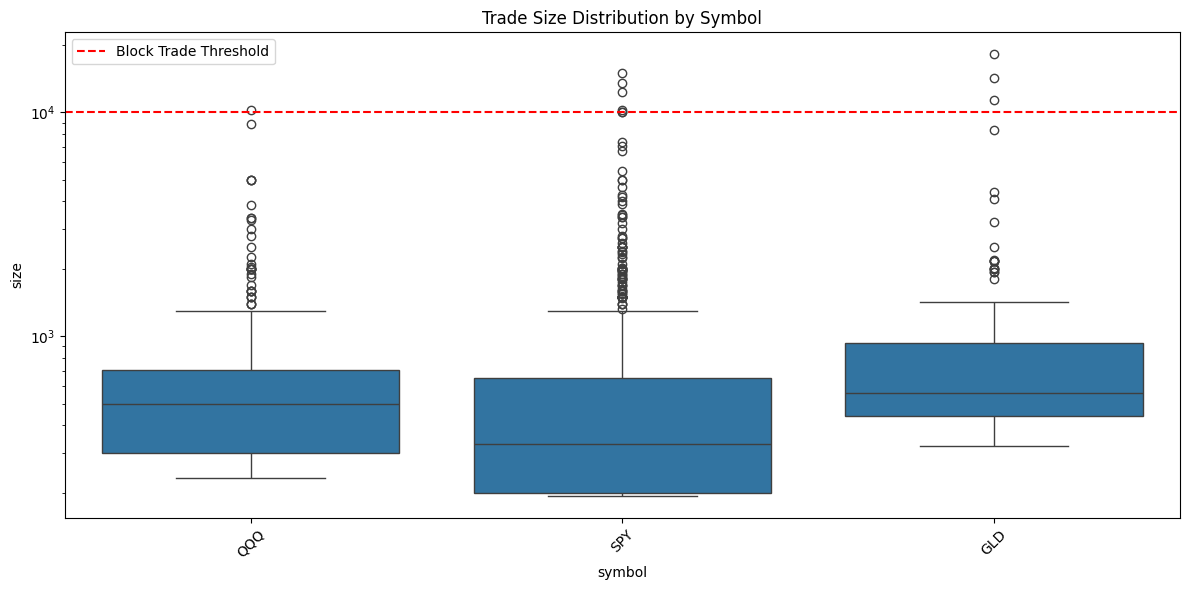

In [127]:
# Constants
BLOCK_SIZE_THRESHOLD = 10000  # Minimum size for block trade
plt.figure(figsize=(12, 6))
sns.boxplot(x='symbol', y='size', data=trades_df)
plt.axhline(y=BLOCK_SIZE_THRESHOLD, color='r', linestyle='--', label='Block Trade Threshold')
plt.title('Trade Size Distribution by Symbol')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

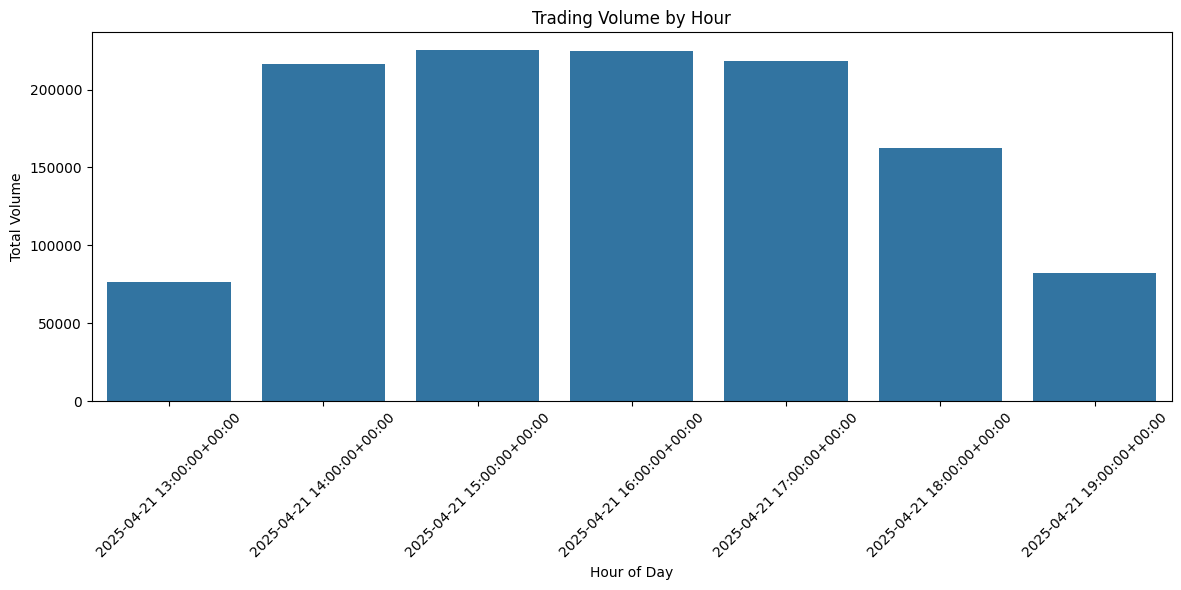

In [128]:
plt.figure(figsize=(12, 6))
hourly_volume = trades_df.groupby('trade_hour')['size'].sum()
sns.barplot(x=hourly_volume.index, y=hourly_volume.values)
plt.title('Trading Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()